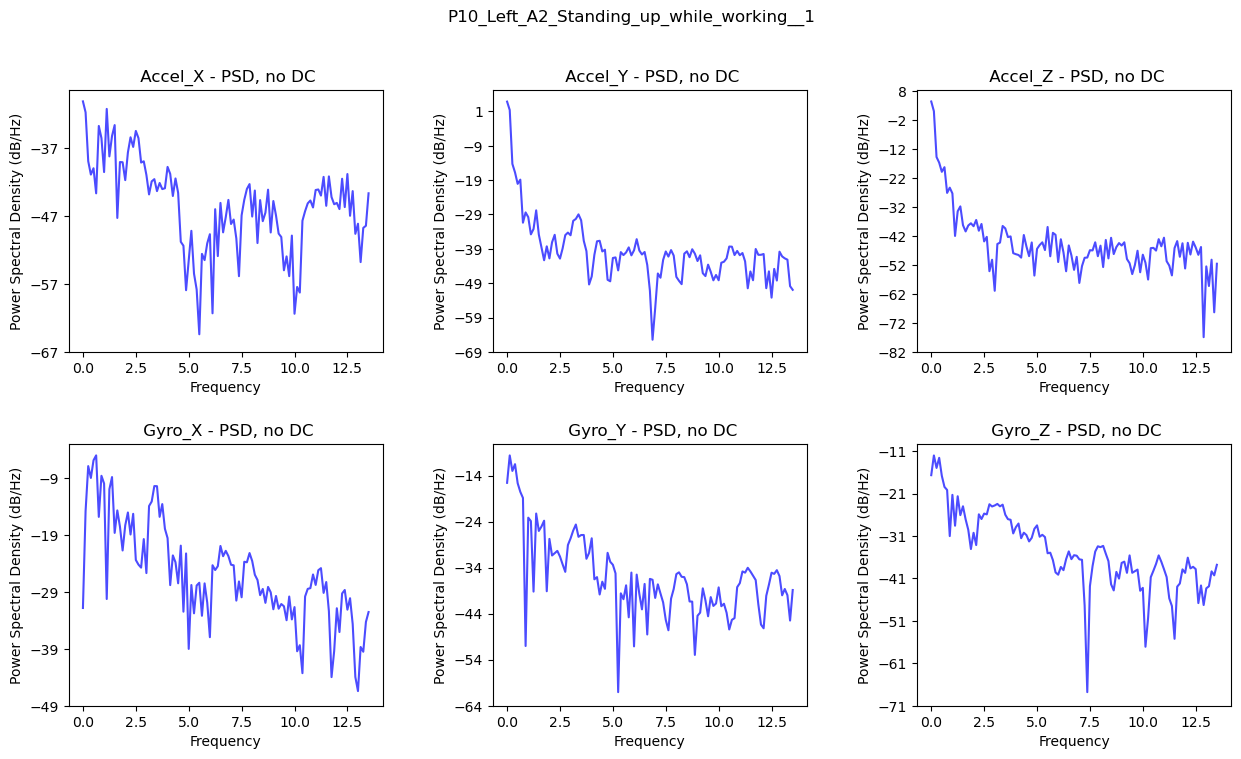

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
from scipy.signal import find_peaks
#from scipy.stats import skew, kurtosis
#from sklearn.preprocessing import MinMaxScaler

import os

def calculate_sampling_frequency(dataframe):
    frequencies = dataframe['timestamp_str_seconds'].value_counts()
    average_frequency = sum(frequencies) / len(frequencies)

    return average_frequency


df = pd.read_csv('C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\BlobsOFSegments\\P10_Left_A2_Standing_up_while_working__1.csv')
#df = pd.read_csv('C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\BlobsOFSegments\\P10_Left_A2_NoHyp_2.csv')


selected_columns = df.iloc[:, 4:10]
N = len(selected_columns)
T = 1/calculate_sampling_frequency(df)


num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

for k in range(num_rows):
    for j in range(num_cols):
        column_index = k * num_cols + j
        if column_index >= selected_columns.shape[1]:
            # If there are no more columns to plot, break out of the loop
            break
        #data_no_dc = data - data.mean()
        #data_no_dc = selected_columns.iloc[:, column_index].values - selected_columns.iloc[:, column_index].values.mean()
        data_no_dc = selected_columns.iloc[:, column_index].values

        ax = axes[k, j]  # Get the current axis from the 'axes' array
        ax.psd(data_no_dc, NFFT=N, Fs=1/T, color='blue', alpha=0.7, label='PSD')

        ax.grid()
        ax.set_title(f"{selected_columns.columns[column_index]} - PSD, no DC")

plt.suptitle('P10_Left_A2_Standing_up_while_working__1')
#plt.suptitle('P10_Left_A2_NoHyp_2')

plt.show() 

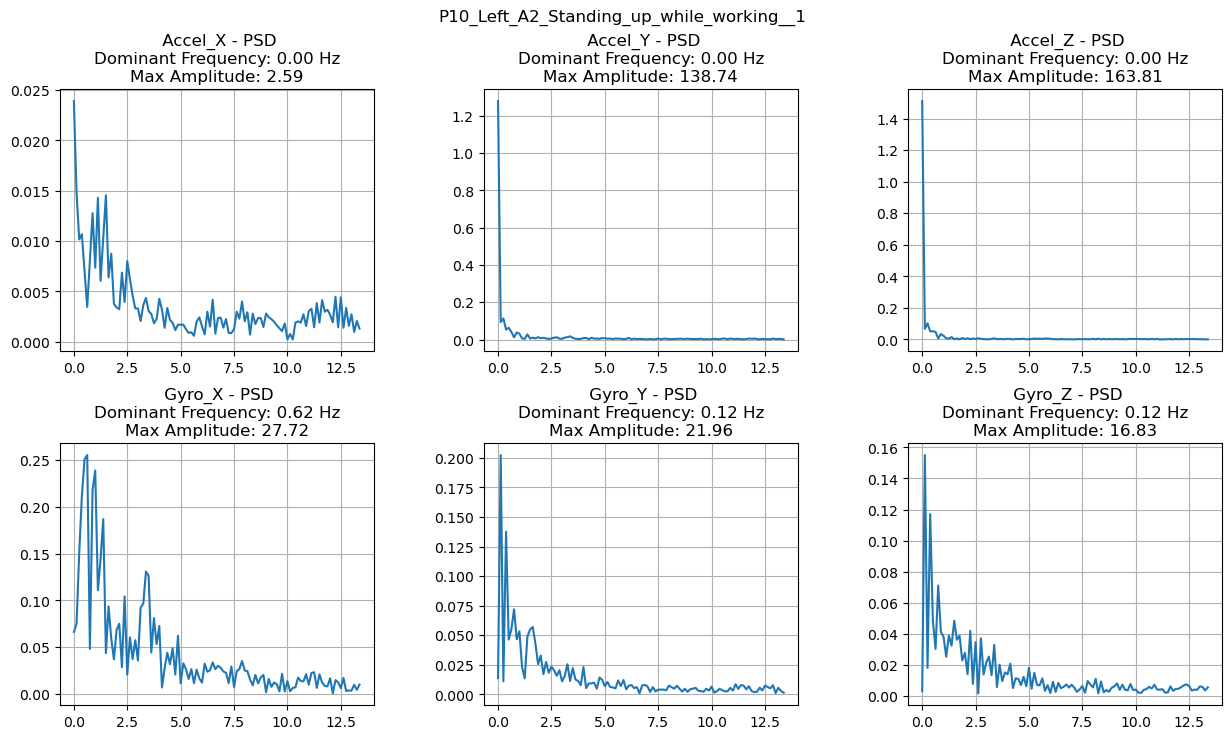

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
from scipy.signal import find_peaks
#from scipy.stats import skew, kurtosis
#from sklearn.preprocessing import MinMaxScaler

import os

def calculate_sampling_frequency(dataframe):
    frequencies = dataframe['timestamp_str_seconds'].value_counts()
    average_frequency = sum(frequencies) / len(frequencies)

    return average_frequency



def dominant_frequency(data, sampling_rate):
    data_no_dc = data# - data.mean()
    fft_result = np.fft.fft(data_no_dc)
    freqs = np.fft.fftfreq(len(fft_result), 1/sampling_rate)
    dominant_freq = np.abs(freqs[np.argmax(np.abs(fft_result))])
    return dominant_freq

def maximum_amplitude(data, sampling_rate,):
    data_no_dc = data #- data.mean()
    fft_result = np.fft.fft(data_no_dc)
    #freqs = np.fft.fftfreq(len(fft_result), 1/sampling_rate)
    # Calculate maximum amplitude for each column
    max_amplitude = np.max(np.abs(fft_result))
    return max_amplitude


df = pd.read_csv('C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\BlobsOFSegments\\P10_Left_A2_Standing_up_while_working__1.csv')
#df = pd.read_csv('C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\BlobsOFSegments\\P10_Left_A2_NoHyp_2.csv')



selected_columns = df.iloc[:, 4:10]
N = len(selected_columns)
fs = calculate_sampling_frequency(df)
T = 1/fs#calculate_sampling_frequency(df)


num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

for k in range(num_rows):
    for j in range(num_cols):
        column_index = k * num_cols + j
        if column_index >= selected_columns.shape[1]:
            # If there are no more columns to plot, break out of the loop
            break
        
        data_no_dc = selected_columns.iloc[:, column_index].values     
        #data_no_dc = selected_columns.iloc[:, column_index].values - selected_columns.iloc[:, column_index].values.mean()

        yf = sc.fft.fft(data_no_dc)
        xf = sc.fft.fftfreq(N, T)[:N//2]

        ax = axes[k, j]  
        ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
        ax.grid()
        ax.set_title(selected_columns.columns[column_index])
        
       
        dominant_freq = dominant_frequency(data_no_dc, fs)
        max_amplitude = maximum_amplitude(data_no_dc, fs)

        title_text = f"{selected_columns.columns[column_index]} - PSD\n"
        title_text += f"Dominant Frequency: {dominant_freq:.2f} Hz\n"
        title_text += f"Max Amplitude: {max_amplitude:.2f}"

        ax.set_title(title_text)


plt.suptitle('P10_Left_A2_Standing_up_while_working__1')
#plt.suptitle('P10_Left_A2_NoHyp_2')


plt.show()